<a href="https://colab.research.google.com/github/komolcia/SEA_EU/blob/main/3_pun_translationES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openai

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.3/70.3 kB 641.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 kB 15.2 MB/s eta 0:00:00


In [2]:
from sklearn.metrics import accuracy_score, f1_score, precision_score,recall_score
from random import randint
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB,BernoulliNB,CategoricalNB
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import numpy as np
import pandas as pd
import openai
import os
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score,classification_report
import pandas as pd
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import re
from mlxtend.plotting import plot_learning_curves
from sklearn.ensemble import RandomForestClassifier
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder 
from sklearn.linear_model import RidgeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler 
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [7]:
data_train = pd.read_json("joker_parallel_EN_ES_train.json",lines=True)
data_test=pd.read_json("joker_translation_test.json")
data_train
# y=[]
# for x in data_train['wordplay']:
#     if x =="no":
#         y.append(False)
#     else:
#         y.append(True)
# data_train['pun_label']=y
# data_train

,id_en,text_en,id_es,text_es
0,en_3413,Diabetics should not be allowed to have sweet ...,es_3413a,Los diabéticos no deberían tener dulces sueños.
1,en_3413,Diabetics should not be allowed to have sweet ...,es_3413b,A los diabéticos se les prohíben los dulces su...
2,en_3413,Diabetics should not be allowed to have sweet ...,es_3413c,Los diabéticos no deberían tener permitido ten...
3,en_3413,Diabetics should not be allowed to have sweet ...,es_3413d,A los diabéticos no se les debe permitir tener...
4,en_7865,I'm going to the guillotine at dawn and my wif...,es_7865a,Al amanecer me van a pasar por la guillotina y...
...,...,...,...,...
560,en_5439,He was a restaurant critic but had no taste.,es_5439a,Era un crítico de restaurantes pero no tenía b...
561,en_5439,He was a restaurant critic but had no taste.,es_5439b,"Era un crítico gastronómico, pero no tenía ni ..."
562,en_5439,He was a restaurant critic but had no taste.,es_5439c,"Era crítico gastronómico, pero no tenía nada d..."
563,en_5439,He was a restaurant critic but had no taste.,es_5439d,"Era crítico gastronómico, pero no tenía buen g..."


In [9]:
#Idk what should we classify we will have true and false values if have many translations and by how many words
da =[]
howmanywords=[]
for y in range(0,len(data_train.index)):
  if (data_train.id_en == data_train.id_en[y]).sum() >1 :
    da.append(True)
  else:
    da.append(False)
  howmanywords.append(len(data_train.text_es[y].split()))
data_train["hasmany"]=da
data_train["howmany"]=howmanywords

In [10]:
data_train

,id_en,text_en,id_es,text_es,hasmany,howmany
0,en_3413,Diabetics should not be allowed to have sweet ...,es_3413a,Los diabéticos no deberían tener dulces sueños.,True,7
1,en_3413,Diabetics should not be allowed to have sweet ...,es_3413b,A los diabéticos se les prohíben los dulces su...,True,9
2,en_3413,Diabetics should not be allowed to have sweet ...,es_3413c,Los diabéticos no deberían tener permitido ten...,True,9
3,en_3413,Diabetics should not be allowed to have sweet ...,es_3413d,A los diabéticos no se les debe permitir tener...,True,11
4,en_7865,I'm going to the guillotine at dawn and my wif...,es_7865a,Al amanecer me van a pasar por la guillotina y...,False,17
...,...,...,...,...,...,...
560,en_5439,He was a restaurant critic but had no taste.,es_5439a,Era un crítico de restaurantes pero no tenía b...,True,10
561,en_5439,He was a restaurant critic but had no taste.,es_5439b,"Era un crítico gastronómico, pero no tenía ni ...",True,11
562,en_5439,He was a restaurant critic but had no taste.,es_5439c,"Era crítico gastronómico, pero no tenía nada d...",True,9
563,en_5439,He was a restaurant critic but had no taste.,es_5439d,"Era crítico gastronómico, pero no tenía buen g...",True,8


In [11]:
data_test

,id,text
0,en_8,"''I find you guilty,'' said the judge with con..."
1,en_9,"The student had such a big assignment, he had ..."
2,en_10,Herbivores come in browns and graze.
3,en_11,"I'll corroborate that again, Tom reproved."
4,en_13,"I used to do rock climbing as a youth, but I w..."
...,...,...
5722,en_9262,I'm thinking of setting up a comedy group to h...
5723,en_9263,"What did the ocean say to the shore? Nothing, ..."
5724,en_9264,What did the grape do when he got stepped on? ...
5725,en_9265,What is a tornado's favorite game to play? Twi...


In [13]:
from openai.error import RateLimitError
from scipy.sparse import data
import time
openai.api_key = ""
def simpleMyPrompt(prompt,input):

  response = openai.Completion.create(
  model="text-davinci-003",
  prompt=prompt+'Text: '+input+'\nWord:',
  temperature=0.7,
  max_tokens=256,
  top_p=1,
  frequency_penalty=0,
  presence_penalty=0
  )
  return response
prompt =  'Text: Diabetics should not be allowed to have sweet dreams.\n\
Word:Los diabéticos no deberían tener dulces sueños.\n\
\n\
Text: A scientist doing a large experiment with liquid chemicals was trying to solve a problem when he fell in and became part of the solution.\n\
Word: Un científico que realizaba un gran experimento con productos químicos líquidos intentaba resolver un problema cuando se cayó y se convirtió en parte de la solución.\n\
\n'
a=0
data_test1=[]
for i in range(1,4):
  if i*50<data_test["text"].size:
      data_test1.append(data_test['text'].iloc[a:i*40].apply(lambda x:simpleMyPrompt(prompt,x)))
  a=i*50
  time.sleep(30)
  print(i)
  #print(data_test1)


1
2
3


In [14]:
data_test1

[0     {'id': 'cmpl-74xcFHJLSiPUB8E0WAUR7s3GkLRDX', '...
 1     {'id': 'cmpl-74xcFqB3os0S1e6O9XOb0aBwkAXpm', '...
 2     {'id': 'cmpl-74xcGpWBNmdjQWPql62Lvpeis0cap', '...
 3     {'id': 'cmpl-74xcHm4fjUb4wV9xYK2xAhtdiDvXA', '...
 4     {'id': 'cmpl-74xcHBfhfS8TJOpNbe6W3SHSrOvBY', '...
 5     {'id': 'cmpl-74xcIf9Vksep9tpmjym6USuRytJsr', '...
 6     {'id': 'cmpl-74xcJfylhTBHIs2oUuYfMxS19xLS1', '...
 7     {'id': 'cmpl-74xcJYFmrU7j2yKsHRFaURZz9klOf', '...
 8     {'id': 'cmpl-74xcKyQokOAGh8TQmTMhrzcDGXYFQ', '...
 9     {'id': 'cmpl-74xcLT9tqV187lYJZczsQckrJl5NH', '...
 10    {'id': 'cmpl-74xcLn1BLggIb2NKRmbiwALrFNsIT', '...
 11    {'id': 'cmpl-74xcMSVX4X3MLKjHUJBoAwVzWNDYc', '...
 12    {'id': 'cmpl-74xcNKDCAcH2WUpYgKCNToMYwK7B6', '...
 13    {'id': 'cmpl-74xcN0rZTfumirqyX9sO14SYIrvIp', '...
 14    {'id': 'cmpl-74xcNTuaqQVf5SmYSCS5MGSR4Iqz6', '...
 15    {'id': 'cmpl-74xcO6JSWq8YhjNMKA19ZHJ0w7TIM', '...
 16    {'id': 'cmpl-74xcPFdo5RAyyuyCmFLQI85CZOCGn', '...
 17    {'id': 'cmpl-74xcPh2auVg

In [15]:
from functools import reduce
from operator import concat
data_test3 = pd.DataFrame()

data_test3['text_fr_gpt3_my_full']=[smt for sublist in data_test1 for smt in sublist]
print(data_test3['text_fr_gpt3_my_full'])
data_test3['text_fr_gpt3_my']=data_test3['text_fr_gpt3_my_full'].str['choices'].str[0].str['text'].str.strip()
data_test3['text_fr']=data_test3['text_fr_gpt3_my'].str.split('\n')
data_test3['id_en']=data_test['id'].iloc[:90]
data_test3

0     {'id': 'cmpl-74xcFHJLSiPUB8E0WAUR7s3GkLRDX', '...
1     {'id': 'cmpl-74xcFqB3os0S1e6O9XOb0aBwkAXpm', '...
2     {'id': 'cmpl-74xcGpWBNmdjQWPql62Lvpeis0cap', '...
3     {'id': 'cmpl-74xcHm4fjUb4wV9xYK2xAhtdiDvXA', '...
4     {'id': 'cmpl-74xcHBfhfS8TJOpNbe6W3SHSrOvBY', '...
                            ...                        
85    {'id': 'cmpl-74xe2CIfzGVeFNiX7jT8R8k2tMdSu', '...
86    {'id': 'cmpl-74xe2vNENNApgEXzVZlDpXovp4qsV', '...
87    {'id': 'cmpl-74xe36yIOtwSUkVoruyIUtMttxOhu', '...
88    {'id': 'cmpl-74xe4COGX6NHAwUOH6iUJPUXtpZKW', '...
89    {'id': 'cmpl-74xe4HJ5Pct6Mya7xTJbHONdF35n2', '...
Name: text_fr_gpt3_my_full, Length: 90, dtype: object


,text_fr_gpt3_my_full,text_fr_gpt3_my,text_fr,id_en
0,"{'id': 'cmpl-74xcFHJLSiPUB8E0WAUR7s3GkLRDX', '...","''Te declaro culpable'', dijo el juez con conv...","[''Te declaro culpable'', dijo el juez con con...",en_8
1,"{'id': 'cmpl-74xcFqB3os0S1e6O9XOb0aBwkAXpm', '...",El estudiante tenía una tarea tan grande que t...,[El estudiante tenía una tarea tan grande que ...,en_9
2,"{'id': 'cmpl-74xcGpWBNmdjQWPql62Lvpeis0cap', '...",Los herbívoros vienen en tonos marrones y pastan.,[Los herbívoros vienen en tonos marrones y pas...,en_10
3,"{'id': 'cmpl-74xcHm4fjUb4wV9xYK2xAhtdiDvXA', '...","Volveré a corroborar eso, Tom reprobó.","[Volveré a corroborar eso, Tom reprobó.]",en_11
4,"{'id': 'cmpl-74xcHBfhfS8TJOpNbe6W3SHSrOvBY', '...","Solía hacer escalada de roca cuando era joven,...",[Solía hacer escalada de roca cuando era joven...,en_13
...,...,...,...,...
85,"{'id': 'cmpl-74xe2CIfzGVeFNiX7jT8R8k2tMdSu', '...",Ella se convirtió en una operadora telefónica ...,[Ella se convirtió en una operadora telefónica...,en_205
86,"{'id': 'cmpl-74xe2vNENNApgEXzVZlDpXovp4qsV', '...",Los ladrones tienen músculos de acero.,[Los ladrones tienen músculos de acero.],en_208
87,"{'id': 'cmpl-74xe36yIOtwSUkVoruyIUtMttxOhu', '...","Si respiras fuertemente en el mapa, revelará l...","[Si respiras fuertemente en el mapa, revelará ...",en_211
88,"{'id': 'cmpl-74xe4COGX6NHAwUOH6iUJPUXtpZKW', '...","''¡Detente, caballo! ¡Detente!'' gritó Tom co...","[''¡Detente, caballo! ¡Detente!'' gritó Tom c...",en_220


In [16]:
#Idk what should we classify we will have true and false values if have many translations and by how many words
da =[]
howmanywords=[]
for y in range(0,len(data_test3.index)):
  if (data_test3.id_en == data_test3.id_en[y]).sum() >1 :
    da.append(True)
  else:
    da.append(False)
  howmanywords.append(len(data_test3.text_fr_gpt3_my[y].split()))
data_test3["hasmany"]=da
data_test3["howmany"]=howmanywords
data_test3

,text_fr_gpt3_my_full,text_fr_gpt3_my,text_fr,id_en,hasmany,howmany
0,"{'id': 'cmpl-74xcFHJLSiPUB8E0WAUR7s3GkLRDX', '...","''Te declaro culpable'', dijo el juez con conv...","[''Te declaro culpable'', dijo el juez con con...",en_8,False,8
1,"{'id': 'cmpl-74xcFqB3os0S1e6O9XOb0aBwkAXpm', '...",El estudiante tenía una tarea tan grande que t...,[El estudiante tenía una tarea tan grande que ...,en_9,False,17
2,"{'id': 'cmpl-74xcGpWBNmdjQWPql62Lvpeis0cap', '...",Los herbívoros vienen en tonos marrones y pastan.,[Los herbívoros vienen en tonos marrones y pas...,en_10,False,8
3,"{'id': 'cmpl-74xcHm4fjUb4wV9xYK2xAhtdiDvXA', '...","Volveré a corroborar eso, Tom reprobó.","[Volveré a corroborar eso, Tom reprobó.]",en_11,False,6
4,"{'id': 'cmpl-74xcHBfhfS8TJOpNbe6W3SHSrOvBY', '...","Solía hacer escalada de roca cuando era joven,...",[Solía hacer escalada de roca cuando era joven...,en_13,False,14
...,...,...,...,...,...,...
85,"{'id': 'cmpl-74xe2CIfzGVeFNiX7jT8R8k2tMdSu', '...",Ella se convirtió en una operadora telefónica ...,[Ella se convirtió en una operadora telefónica...,en_205,False,11
86,"{'id': 'cmpl-74xe2vNENNApgEXzVZlDpXovp4qsV', '...",Los ladrones tienen músculos de acero.,[Los ladrones tienen músculos de acero.],en_208,False,6
87,"{'id': 'cmpl-74xe36yIOtwSUkVoruyIUtMttxOhu', '...","Si respiras fuertemente en el mapa, revelará l...","[Si respiras fuertemente en el mapa, revelará ...",en_211,False,15
88,"{'id': 'cmpl-74xe4COGX6NHAwUOH6iUJPUXtpZKW', '...","''¡Detente, caballo! ¡Detente!'' gritó Tom co...","[''¡Detente, caballo! ¡Detente!'' gritó Tom c...",en_220,False,7


Classes:  [False  True]

*--------------------------------------------------*

Score:  0.0

*--------------------------------------------------*

Training set score: 0.9181
Test set score: 0.0000

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      81.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
weighted avg       0.00      0.00      0.00      81.0


*--------------------------------------------------*



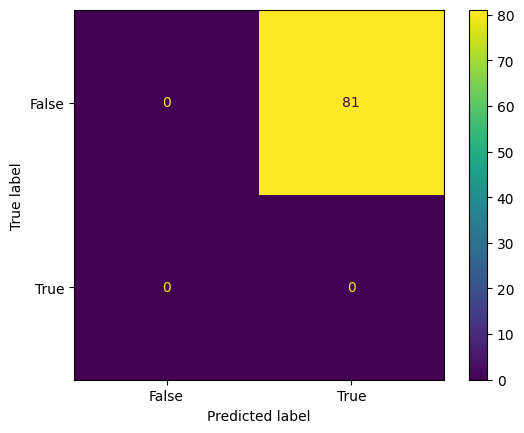

In [17]:
X=data_train["howmany"].values.astype("int").reshape(-1, 1)
y = data_train["hasmany"].values
X_train, X_test1,y_train,y_test1 = train_test_split(X,y,test_size=0.2,random_state=7)
X=data_test3["howmany"].values.astype("int").reshape(-1, 1)
y = data_test3["hasmany"].values 
X_train1, X_test,y_train1,y_test = train_test_split(X,y,test_size=0.9,random_state=7)

#X_train, y_train = train.drop("target"), train["target"]
#X_test, y_test = test.drop("target"), test["target"]

clf=RandomForestClassifier()
clf.fit(X_train, y_train)
pred_labels=clf.predict(X_test)
print("Classes: ",clf.classes_)
score=clf.score(X_test,y_test)
print("\n*--------------------------------------------------*\n")
print("Score: ",score)
print("\n*--------------------------------------------------*\n")
print('Training set score: {:.4f}'.format(clf.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(clf.score(X_test, y_test)))
print("\n*--------------------------------------------------*\n")
print( classification_report(y_test,pred_labels))
print("\n*--------------------------------------------------*\n")
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
disp.plot()

plt.show()


In [18]:
def naive_Bayes(X,y,typ):
    model=typ
    clf=model.fit(X_train,y_train)
    pred_labels=model.predict(X_test)
    print("Classes: ",clf.classes_)
    print("\n*--------------------------------------------------*\n")
    if str(typ)=='GaussianNB()':
        print("Class Priors: ", clf.class_prior_)
    else:
        print("Class Priors: ", clf.class_log_prior_)
    score=model.score(X_test,y_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels

Classes:  [False  True]

*--------------------------------------------------*

Class Priors:  [0.08185841 0.91814159]

*--------------------------------------------------*

Score:  0.0

*--------------------------------------------------*

Training set score: 0.9181
Test set score: 0.0000

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      81.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
weighted avg       0.00      0.00      0.00      81.0


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      81.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
w

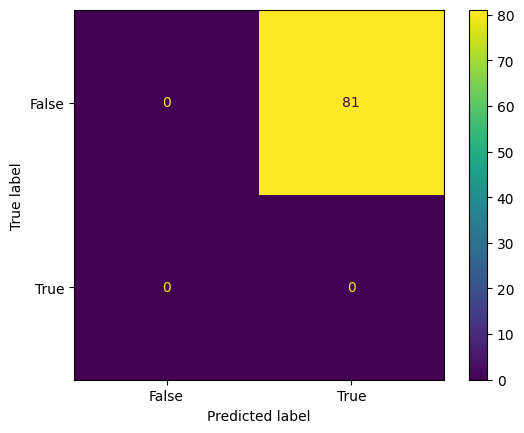

(array([[22],
        [14],
        [23],
        [ 9],
        [ 9],
        [ 8],
        [ 8],
        [15],
        [13],
        [ 7],
        [12],
        [12],
        [ 5],
        [14],
        [19],
        [11],
        [27],
        [12],
        [15],
        [10],
        [20],
        [11],
        [10],
        [12],
        [16],
        [ 9],
        [17],
        [12],
        [11],
        [13],
        [12],
        [13],
        [ 9],
        [ 7],
        [14],
        [13],
        [14],
        [ 6],
        [17],
        [ 9],
        [17],
        [12],
        [10],
        [ 6],
        [17],
        [11],
        [16],
        [13],
        [20],
        [ 9],
        [12],
        [ 5],
        [ 8],
        [ 6],
        [12],
        [11],
        [11],
        [14],
        [20],
        [16],
        [26],
        [29],
        [17],
        [12],
        [17],
        [ 6],
        [11],
        [ 9],
        [14],
        [16],
        [12],
      

In [19]:
naive_Bayes(X,y, GaussianNB())


*--------------------------------------------------*

Score:  0.0

*--------------------------------------------------*

Training set score: 0.9181
Test set score: 0.0000

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      81.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
weighted avg       0.00      0.00      0.00      81.0


*--------------------------------------------------*



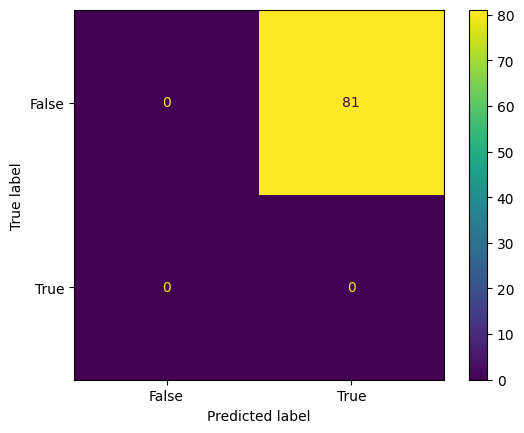

(array([[22],
        [14],
        [23],
        [ 9],
        [ 9],
        [ 8],
        [ 8],
        [15],
        [13],
        [ 7],
        [12],
        [12],
        [ 5],
        [14],
        [19],
        [11],
        [27],
        [12],
        [15],
        [10],
        [20],
        [11],
        [10],
        [12],
        [16],
        [ 9],
        [17],
        [12],
        [11],
        [13],
        [12],
        [13],
        [ 9],
        [ 7],
        [14],
        [13],
        [14],
        [ 6],
        [17],
        [ 9],
        [17],
        [12],
        [10],
        [ 6],
        [17],
        [11],
        [16],
        [13],
        [20],
        [ 9],
        [12],
        [ 5],
        [ 8],
        [ 6],
        [12],
        [11],
        [11],
        [14],
        [20],
        [16],
        [26],
        [29],
        [17],
        [12],
        [17],
        [ 6],
        [11],
        [ 9],
        [14],
        [16],
        [12],
      

In [20]:
def generic_fun(X,y,typ):
    model=typ
    clf=model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    pred_labels=model.predict(X_test)
    print("\n*--------------------------------------------------*\n")
    print("Score: ",score)
    print("\n*--------------------------------------------------*\n")
    print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))
    print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    y_pred = clf.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    return X_train,X_test,y_train,y_test,clf,pred_labels
generic_fun(X,y, RidgeClassifier() )


[[1.63850145]
 [0.15914533]
 [1.82342097]]
Percent:  0.0
Training set score: 0.9181
Test set score: 0.0000

*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      81.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
weighted avg       0.00      0.00      0.00      81.0


*--------------------------------------------------*

              precision    recall  f1-score   support

       False       0.00      0.00      0.00      81.0
        True       0.00      0.00      0.00       0.0

    accuracy                           0.00      81.0
   macro avg       0.00      0.00      0.00      81.0
weighted avg       0.00      0.00      0.00      81.0


*--------------------------------------------------*



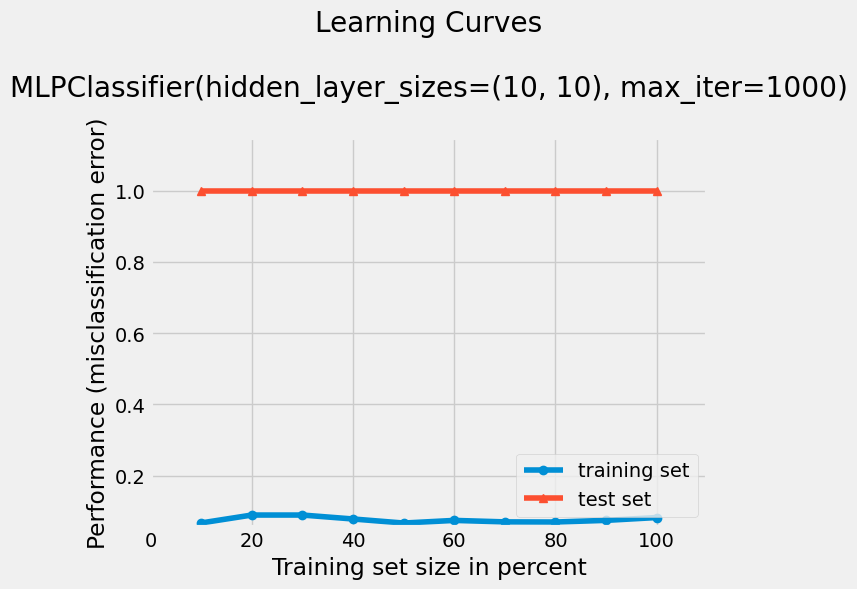

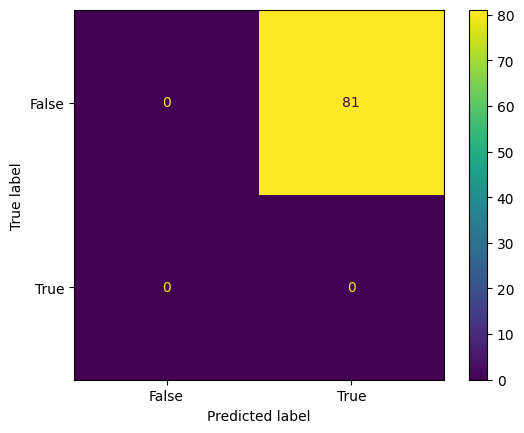

In [21]:
def neural_network(hidden_layer_sizes,max_iter,activation,solver,learning_rate,X,y):
    scaler = StandardScaler()

    scaler.fit(X_train)

    train_data = scaler.transform(X_train)
    test_data = scaler.transform(X_test)
    print(train_data[:3])

    mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, max_iter=max_iter,
                        activation=activation,
                        solver=solver,
                        learning_rate=learning_rate)

    mlp.fit(train_data, y_train)
    pred_labels=mlp.predict(X_test)
    predictions_train = mlp.predict(train_data)
    predictions_test = mlp.predict(test_data)
    percent = (mlp.score(test_data, y_test))
    print("Percent: ",percent)
    print('Training set score: {:.4f}'.format(mlp.score(train_data, y_train)))
    print('Test set score: {:.4f}'.format(mlp.score(test_data, y_test)))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    print( classification_report(y_test,pred_labels))
    print("\n*--------------------------------------------------*\n")
    plot_learning_curves(X_train, y_train, X_test, y_test,mlp)
    y_pred = mlp.predict(X_test)
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=clf.classes_)
      
    disp.plot()

    plt.show()
    plt.show()
    return ["Neural Network", percent, mlp]
r=neural_network((10, 10),1000,'relu','adam','constant',X,y)

In [ ]:
pip install fasttext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#doesn't work
import fasttext
model = fasttext.train_supervised(input="train.txt")
model.predict("flour")
print(model.test("test.txt") )
text = "coach"
labels, prob = model.predict(text)
print("Label:", labels)
print("Probability:", prob)

In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 76.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 27.3 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer, BloomForTokenClassification
import torch

tokenizer = AutoTokenizer.from_pretrained("bigscience/bloom-560m")
model = BloomForTokenClassification.from_pretrained("bigscience/bloom-560m")

inputs = tokenizer(
    "HuggingFace is a company based in Paris and New York", add_special_tokens=False, return_tensors="pt"
)

with torch.no_grad():
    logits = model(**inputs).logits

predicted_token_class_ids = logits.argmax(-1)

# Note that tokens are classified rather then input words which means that
# there might be more predicted token classes than words.
# Multiple token classes might account for the same word
predicted_tokens_classes = [model.config.id2label[t.item()] for t in predicted_token_class_ids[0]]

labels = predicted_token_class_ids
loss = model(**inputs, labels=labels).loss

Some weights of BloomForTokenClassification were not initialized from the model checkpoint at bigscience/bloom-560m and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
